In [1]:
import pandas as pd
import math
from sklearn import neighbors, datasets
from numpy.random import permutation
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [2]:
student_info = {
                'profile_updated': True,
                'gre_verbal_score': 160,
                'gre_quant_score': 160,
                'gre_awa_score': 5,
                'intended_semester': 'F',
                'toefl_score': 115,
                'undergrad_gpa': 3.5,
                'intended_field': 'Computer Science',
                'intended_degree': 'MS' 
            }
college_name = 'Carnegie Mellon University'

In [3]:
data_file_path = 'CNN_data_processed.csv'

data = pd.read_csv(data_file_path, header=0)
data.head()


,Number,Toefl,Verbal,Quant,AWA,GPA,GPA Scale,University
0,0,112,160,167,4.5,0.8500,10,Worcester Polytechnic Institute
1,2,94,146,157,3.0,0.7828,100,Worcester Polytechnic Institute
2,4,81,148,170,2.5,0.5700,100,Worcester Polytechnic Institute
3,6,104,150,161,4.5,0.6220,100,Worcester Polytechnic Institute
4,7,95,147,156,3.0,0.5200,100,Worcester Polytechnic Institute


In [4]:
len(data)
# removing unis with low frequencies
# column = 'univName'
# minimum_frequency = 2580
# data = data[data.groupby(column)[column].transform('count').ge(minimum_frequency)]

# # data = data.drop('Degree', 1)
# data = data.drop('Decision', 1)
# data = data.drop('Season', 1)
data

,Number,Toefl,Verbal,Quant,AWA,GPA,GPA Scale,University
0,0,112,160,167,4.5,0.8500,10,Worcester Polytechnic Institute
1,2,94,146,157,3.0,0.7828,100,Worcester Polytechnic Institute
2,4,81,148,170,2.5,0.5700,100,Worcester Polytechnic Institute
3,6,104,150,161,4.5,0.6220,100,Worcester Polytechnic Institute
4,7,95,147,156,3.0,0.5200,100,Worcester Polytechnic Institute
...,...,...,...,...,...,...,...,...
5141,10292,116,130,170,5.0,0.8500,10,University of Southern California
5142,10295,106,151,159,3.5,0.8724,10,University of Southern California
5143,10296,109,165,170,3.5,0.6785,100,University of Southern California
5144,10297,113,159,163,3.5,0.8200,10,University of Southern California


In [5]:
all_uni_list = data['University'].unique().tolist()
all_uni_list

['Worcester Polytechnic Institute',
 'Wayne State University',
 'Virginia Polytechnic Institute and State University',
 'University of Wisconsin Madison',
 'University of Washington',
 'University of Utah',
 'University of Texas Dallas',
 'University of Texas Austin',
 'University of Texas Arlington',
 'University of Southern California']

In [6]:
np.random.seed(42)
random_indices = permutation(data.index)
test_cutoff = math.floor(len(data)/5)
# print(test_cutoff)
test = data.loc[random_indices[1:test_cutoff]]
print(type(test))
train = data.loc[random_indices[test_cutoff:]]

train_output_data = train['University']

train_input_data = train
train_input_data = train_input_data.drop('University',1)
test_output_data = test['University']
test_input_data = test
test_input_data = test_input_data.drop('University',1)
print(train_output_data)

<class 'pandas.core.frame.DataFrame'>
99                 Wayne State University
1501           University of Texas Dallas
3994    University of Southern California
2906           University of Texas Dallas
5111    University of Southern California
                      ...                
4426    University of Southern California
466       University of Wisconsin Madison
3092           University of Texas Dallas
3772        University of Texas Arlington
860                    University of Utah
Name: University, Length: 4117, dtype: object


In [7]:
def label_uni(college_name):
    index = all_uni_list.index(college_name)
    initial_list = [0]*len(all_uni_list)
    initial_list[index] = 1
    return np.array(initial_list)

In [8]:
trainlabel=[]
for i in train_output_data :
    train_labels=label_uni(i)
    trainlabel.append(train_labels)


In [9]:
trainlabel=np.array(trainlabel)
print(trainlabel.shape)

print(train_input_data.shape)
print(test_input_data.shape)

(4117, 10)
(4117, 7)
(1028, 7)


In [10]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(7,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
print(len(train_input_data.columns))
train_input_data=train_input_data.values.reshape(4117,7,1)

test_input_data=test_input_data.values.reshape(1028,7,1)

7


In [13]:
train_mean = np.mean(train_input_data, axis=0)
train_std = np.std(train_input_data, axis=0)
test_mean = np.mean(test_input_data, axis=0)
test_std = np.std(test_input_data, axis=0)

train_norm = (train_input_data - train_mean) / train_std
test_norm = (test_input_data - test_mean) / test_std

In [14]:
testlabel=[]
for i in test_output_data :
    test_labels=label_uni(i)
    testlabel.append(test_labels)
    
testlabel=np.array(testlabel)
print(testlabel.shape)
print(train_input_data.shape)

(1028, 10)
(4117, 7, 1)


In [15]:
model.fit(train_norm, trainlabel, epochs=10, verbose=1)

Epoch 1/10
129/129 [==============================] - 1s 3ms/step - loss: 1.8527 - accuracy: 0.4699
Epoch 2/10
129/129 [==============================] - 0s 2ms/step - loss: 1.0831 - accuracy: 0.6600
Epoch 3/10
129/129 [==============================] - 0s 2ms/step - loss: 0.9019 - accuracy: 0.7006
Epoch 4/10
129/129 [==============================] - 0s 2ms/step - loss: 0.8055 - accuracy: 0.7316
Epoch 5/10
129/129 [==============================] - 0s 2ms/step - loss: 0.7490 - accuracy: 0.7438
Epoch 6/10
129/129 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.7747
Epoch 7/10
129/129 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.7798
Epoch 8/10
129/129 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.7841
Epoch 9/10
129/129 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.8137
Epoch 10/10
129/129 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.8181

In [16]:
def call(x):
    return all_uni_list[x]

In [17]:
from numpy.random import randint
from numpy import argmax
from keras.utils.np_utils import to_categorical

score = model.evaluate(test_norm, testlabel, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)
print(test_norm[1000:1001])
print('len', len(test_norm))
y = model.predict(test_norm[1000:1001])
#print(test_input_data[1:])
print(y)
m=call(np.argmax(y))
print(m)

33/33 [==============================] - 0s 1ms/step - loss: 0.5480 - accuracy: 0.8268
Test loss: 0.5480096340179443
Test accuracy: 82.68482685089111
[[[ 0.75326052]
  [-1.33183846]
  [-0.90995566]
  [-0.28526469]
  [-0.12140528]
  [-1.08576708]
  [ 0.90454148]]]
len 1028
[[5.4818982e-05 1.2580901e-04 1.2538811e-04 3.1866750e-04 4.6832536e-04
  2.9662286e-04 2.4585519e-03 1.9401183e-03 9.4262922e-01 5.1582556e-02]]
University of Texas Arlington


In [18]:
from sklearn.metrics import classification_report
y_pred=model.predict(test_norm, batch_size=20, verbose=2)
report = classification_report(testlabel, y_pred.round())
print(report)

52/52 - 0s
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        20
           1       1.00      0.15      0.27        26
           2       0.79      0.51      0.62        53
           3       1.00      0.02      0.05        41
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        47
           6       0.92      0.96      0.94       400
           7       0.89      0.50      0.64        32
           8       0.87      0.89      0.88       132
           9       0.95      0.99      0.97       231

   micro avg       0.92      0.76      0.83      1028
   macro avg       0.74      0.41      0.45      1028
weighted avg       0.84      0.76      0.76      1028
 samples avg       0.76      0.76      0.76      1028

C:\Users\hasee\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined a

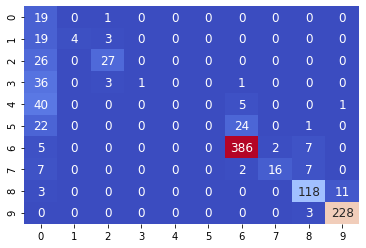

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
def draw_confusion_matrix(true,preds):
    conf_matx = confusion_matrix(true, preds)
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap= 'coolwarm')
    plt.show()
draw_confusion_matrix(testlabel.argmax(axis=1), y_pred.round().argmax(axis=1))

In [20]:
mean = data['Number'].mean()
print(mean)

# print(test.columns)
print((test_norm[1000:1001]))

student_x = np.array([[[mean], [120], [140], [140], [4.5], [3.6], [4] ]])
student_norm = (student_x - test_mean) / test_std
print(student_norm)


5582.333657209483
[[[ 0.75326052]
  [-1.33183846]
  [-0.90995566]
  [-0.28526469]
  [-0.12140528]
  [-1.08576708]
  [ 0.90454148]]]
[[[ 0.01943008]
  [ 1.61764229]
  [-1.01337571]
  [-1.73658514]
  [ 0.08375301]
  [15.99267465]
  [-1.21657982]]]


In [21]:
test_norm[1000:1001]
print(test_norm[1000:1001].tolist())


[[[0.753260524234086], [-1.331838460299905], [-0.9099556556205362], [-0.2852646907601703], [-0.12140527517771438], [-1.0857670805890403], [0.9045414845494136]]]


In [22]:
print(student_norm)
y = model.predict(student_norm)
#print(test_input_data[1:])

print(y)
m=call(np.argmax(y))
print(m)

[[[ 0.01943008]
  [ 1.61764229]
  [-1.01337571]
  [-1.73658514]
  [ 0.08375301]
  [15.99267465]
  [-1.21657982]]]
[[8.3210473e-11 1.4281571e-07 1.5069863e-09 6.8629834e-07 3.0573790e-07
  7.5749638e-05 6.3037717e-01 2.1230128e-02 3.4831131e-01 4.5316865e-06]]
University of Texas Dallas


In [23]:
model.save('models/cnn_model/')

INFO:tensorflow:Assets written to: models/cnn_model/assets


In [24]:
new_model = keras.models.load_model('models/cnn_model/')

In [25]:
y = new_model.predict(student_norm)
#print(test_input_data[1:])

print(y)
m=call(np.argmax(y))
print(m)

[[8.3210473e-11 1.4281571e-07 1.5069863e-09 6.8629834e-07 3.0573790e-07
  7.5749638e-05 6.3037717e-01 2.1230128e-02 3.4831131e-01 4.5316865e-06]]
University of Texas Dallas


In [26]:
training_mean = np.mean(train_input_data, axis=0)
train_std_deviation = np.std(train_input_data, axis=0)
testing_mean = np.mean(test_input_data, axis=0)
test_std_deviation = np.std(test_input_data, axis=0)

print(training_mean)
print(train_std_deviation)
print(testing_mean)
print(test_std_deviation)


[[5.59760845e+03]
 [1.02787952e+02]
 [1.49529269e+02]
 [1.60508866e+02]
 [4.57475103e+00]
 [7.55676586e-01]
 [5.63198931e+01]]
[[2.99181624e+03]
 [1.18829802e+01]
 [9.79996336e+00]
 [1.17163145e+01]
 [3.05715524e+01]
 [3.24254052e-01]
 [4.54606779e+01]]
[[5.52284728e+03]
 [1.02998054e+02]
 [1.49798638e+02]
 [1.60341440e+02]
 [3.88764591e+00]
 [7.43904669e-01]
 [5.90612840e+01]]
[[3.06156058e+03]
 [1.05103246e+01]
 [9.66930430e+00]
 [1.17134710e+01]
 [7.31142789e+00]
 [1.78587722e-01]
 [4.52590806e+01]]


In [27]:
student_x = np.array([[[mean], [120], [140], [140], [4.5], [3.6], [4] ]])
student_norm = (student_x - testing_mean) / test_std_deviation

In [28]:
data['University'].value_counts()

University of Texas Dallas                             2093
University of Southern California                      1160
University of Texas Arlington                           675
University of Utah                                      258
Virginia Polytechnic Institute and State University     248
University of Wisconsin Madison                         196
University of Washington                                193
University of Texas Austin                              129
Wayne State University                                  110
Worcester Polytechnic Institute                          84
Name: University, dtype: int64

In [29]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 64)             256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 64)             12352     
_________________________________________________________________
dropout (Dropout)            (None, 3, 64)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               12900     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

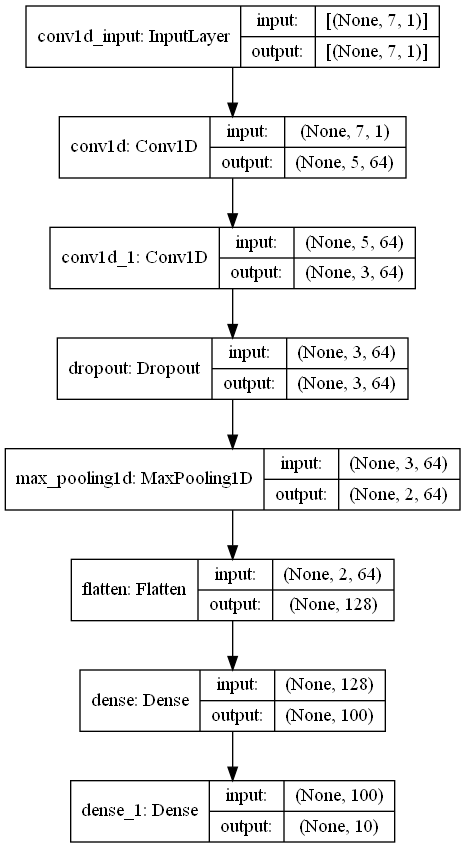

In [30]:
from keras.utils.vis_utils import plot_model
plot_model(new_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)